<a href="https://colab.research.google.com/github/douglasmmachado/MedicineConsumption/blob/master/notebooks/division_approach/3_Feature_Manipulation_and_Comprehension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 - Understanding feautures and selecting the most important ones regarding the consumption



---



---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math as m

df_h1_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/master/datasets/division_approach/df_h1_resampled.csv"
df_h2_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/master/datasets/division_approach/df_h2_resampled.csv"
df_h3_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/master/datasets/division_approach/df_h3_resampled.csv"
df_h4_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/master/datasets/division_approach/df_h4_resampled.csv"



df_h1 = pd.read_csv(df_h1_url)
df_h1['YEAR'] = df_h1['YEAR'].astype(int)
df_h1['MONTH'] = df_h1['MONTH'].astype(int)
df_h1['DATE'] = pd.to_datetime(df_h1['YEAR'].astype(str) + '-' + df_h1['MONTH'].astype(str), format='%Y-%m')

df_h2 = pd.read_csv(df_h2_url)
df_h2['YEAR'] = df_h2['YEAR'].astype(int)
df_h2['MONTH'] = df_h2['MONTH'].astype(int)
df_h2['DATE'] = pd.to_datetime(df_h2['YEAR'].astype(str) + '-' + df_h2['MONTH'].astype(str), format='%Y-%m')

df_h3 = pd.read_csv(df_h3_url)
df_h3['YEAR'] = df_h3['YEAR'].astype(int)
df_h3['MONTH'] = df_h3['MONTH'].astype(int)
df_h3['DATE'] = pd.to_datetime(df_h3['YEAR'].astype(str) + '-' + df_h3['MONTH'].astype(str), format='%Y-%m')

df_h4 = pd.read_csv(df_h4_url)
df_h4['YEAR'] = df_h4['YEAR'].astype(int)
df_h4['MONTH'] = df_h4['MONTH'].astype(int)
df_h4['DATE'] = pd.to_datetime(df_h4['YEAR'].astype(str) + '-' + df_h4['MONTH'].astype(str), format='%Y-%m')

In [2]:
df_h1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   HOSPI_CODE_UCD  525 non-null    int64         
 1   YEAR            525 non-null    int64         
 2   MONTH           525 non-null    int64         
 3   QUANTITY        525 non-null    float64       
 4   CODE_ATC        525 non-null    int64         
 5   N_UFS           525 non-null    float64       
 6   WEEK            525 non-null    int64         
 7   N_ETB           525 non-null    float64       
 8   POPULATION      525 non-null    float64       
 9   P_MEDICAL       525 non-null    float64       
 10  PN_MEDICAL      525 non-null    float64       
 11  LIT_HC          525 non-null    float64       
 12  LIT_HP          525 non-null    float64       
 13  SEJ_MCO         525 non-null    float64       
 14  SEJ_HAD         525 non-null    float64       
 15  SEJ_PS

In [3]:
df_h2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   HOSPI_CODE_UCD  525 non-null    int64         
 1   YEAR            525 non-null    int64         
 2   MONTH           525 non-null    int64         
 3   QUANTITY        525 non-null    float64       
 4   CODE_ATC        525 non-null    int64         
 5   N_UFS           525 non-null    float64       
 6   WEEK            525 non-null    int64         
 7   N_ETB           525 non-null    float64       
 8   POPULATION      525 non-null    float64       
 9   P_MEDICAL       525 non-null    float64       
 10  PN_MEDICAL      525 non-null    float64       
 11  LIT_HC          525 non-null    float64       
 12  LIT_HP          525 non-null    float64       
 13  SEJ_MCO         525 non-null    float64       
 14  SEJ_HAD         525 non-null    float64       
 15  SEJ_PS

In [4]:
df_h3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   HOSPI_CODE_UCD  525 non-null    int64         
 1   YEAR            525 non-null    int64         
 2   MONTH           525 non-null    int64         
 3   QUANTITY        525 non-null    float64       
 4   CODE_ATC        525 non-null    int64         
 5   N_UFS           525 non-null    float64       
 6   WEEK            525 non-null    int64         
 7   N_ETB           525 non-null    float64       
 8   POPULATION      525 non-null    float64       
 9   P_MEDICAL       525 non-null    float64       
 10  PN_MEDICAL      525 non-null    float64       
 11  LIT_HC          525 non-null    float64       
 12  LIT_HP          525 non-null    float64       
 13  SEJ_MCO         525 non-null    float64       
 14  SEJ_HAD         525 non-null    float64       
 15  SEJ_PS

In [5]:
df_h4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   HOSPI_CODE_UCD  525 non-null    int64         
 1   YEAR            525 non-null    int64         
 2   MONTH           525 non-null    int64         
 3   QUANTITY        525 non-null    float64       
 4   CODE_ATC        525 non-null    int64         
 5   N_UFS           525 non-null    float64       
 6   WEEK            525 non-null    int64         
 7   N_ETB           525 non-null    float64       
 8   POPULATION      525 non-null    float64       
 9   P_MEDICAL       525 non-null    float64       
 10  PN_MEDICAL      525 non-null    float64       
 11  LIT_HC          525 non-null    float64       
 12  LIT_HP          525 non-null    float64       
 13  SEJ_MCO         525 non-null    float64       
 14  SEJ_HAD         525 non-null    float64       
 15  SEJ_PS

## 3.1 - Create moving average feature based on medicine

In [6]:
def calculate_moving_average(df, column, period):
    df_copy = df.copy()  # Create a copy of the DataFrame to avoid modifying the original

    for medicine in df_copy['HOSPI_CODE_UCD'].unique():
        mask = df_copy['HOSPI_CODE_UCD'] == medicine
        ma_column = column + '_MA'

        # Calculate the moving average
        vector = df_copy.loc[mask, column].values
        moving_average = np.zeros_like(vector)

        # Calculate the moving average for each index in the vector
        for i in range(len(vector)):
            start = max(0, i - period + 1)
            end = i + 1
            moving_average[i] = np.nanmean(vector[start:end])

        df_copy.loc[mask, ma_column] = moving_average

    return df_copy

In [7]:
def scatterplot_quantity(df, column, period):
    plt.figure(figsize=(15, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(df['HOSPI_CODE_UCD'].unique())))

    for i, code in enumerate(df['HOSPI_CODE_UCD'].unique()):
        subset = df[df['HOSPI_CODE_UCD'] == code]
        plt.plot(subset['DATE'], subset[column], marker='o', linewidth=0.5, color=colors[i], label=code)

    plt.xlabel('DATE')
    plt.ylabel('Quantity')
    plt.title('Scatter Plot of Quantity moving average for the period of: ' + f'{period} months' )
    plt.xticks(rotation=45)
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), title='HOSPI_CODE_UCD')
    plt.grid(True)
    plt.show()

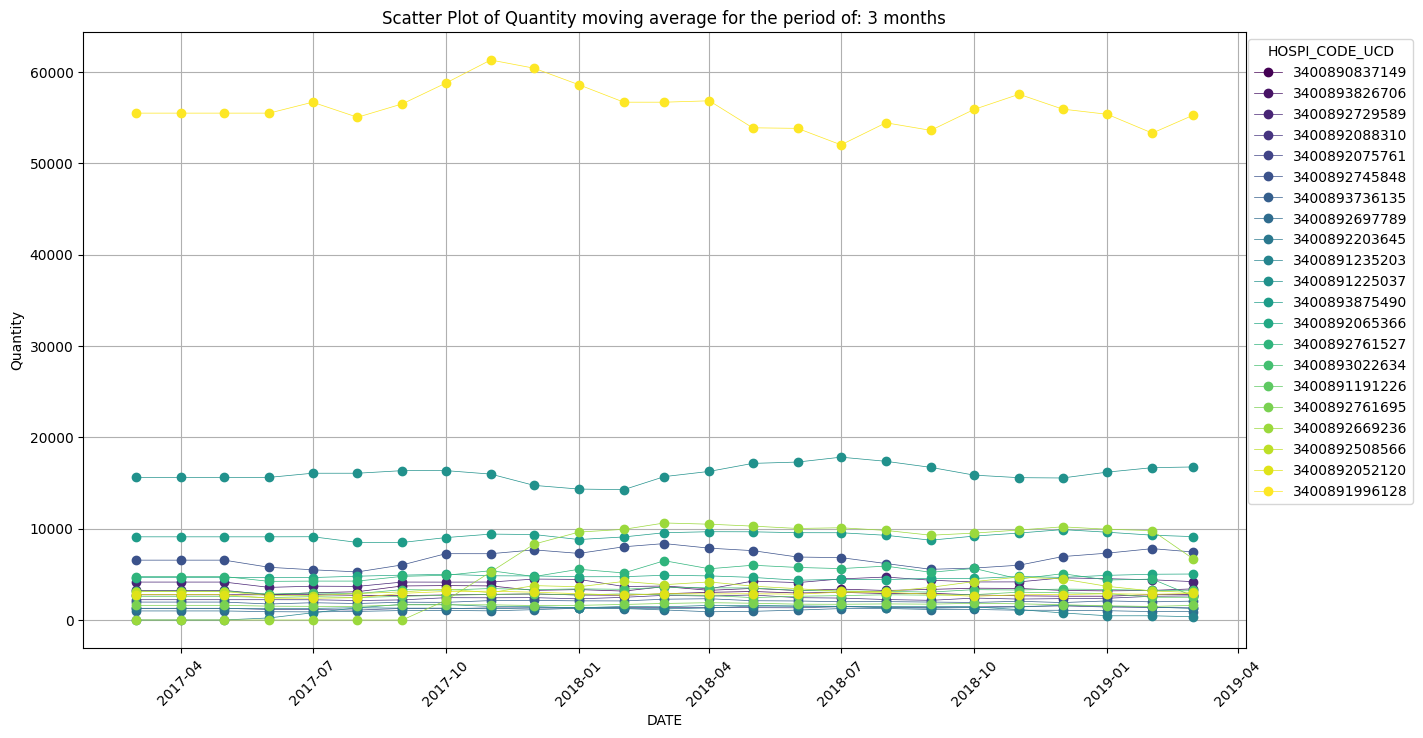

In [8]:
df_h1_ma_3 = calculate_moving_average(df_h1.copy(), 'QUANTITY', 3)
df_h1_ma_3 = df_h1_ma_3.sort_index(axis=1).reset_index(drop=True)
scatterplot_quantity(df_h1_ma_3, 'QUANTITY_MA', 3)

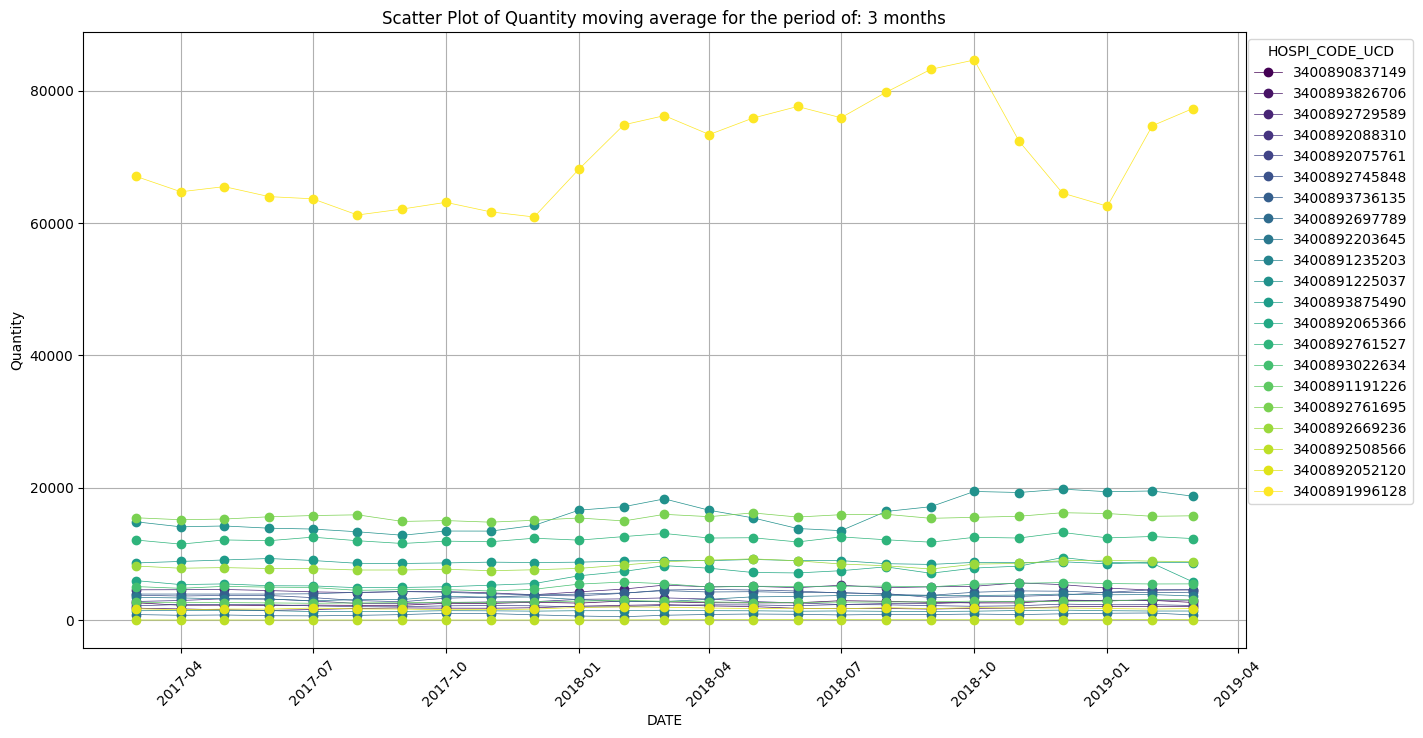

In [9]:
df_h2_ma_3 = calculate_moving_average(df_h2.copy(), 'QUANTITY', 3)
df_h2_ma_3 = df_h2_ma_3.sort_index(axis=1).reset_index(drop=True)
scatterplot_quantity(df_h2_ma_3, 'QUANTITY_MA', 3)

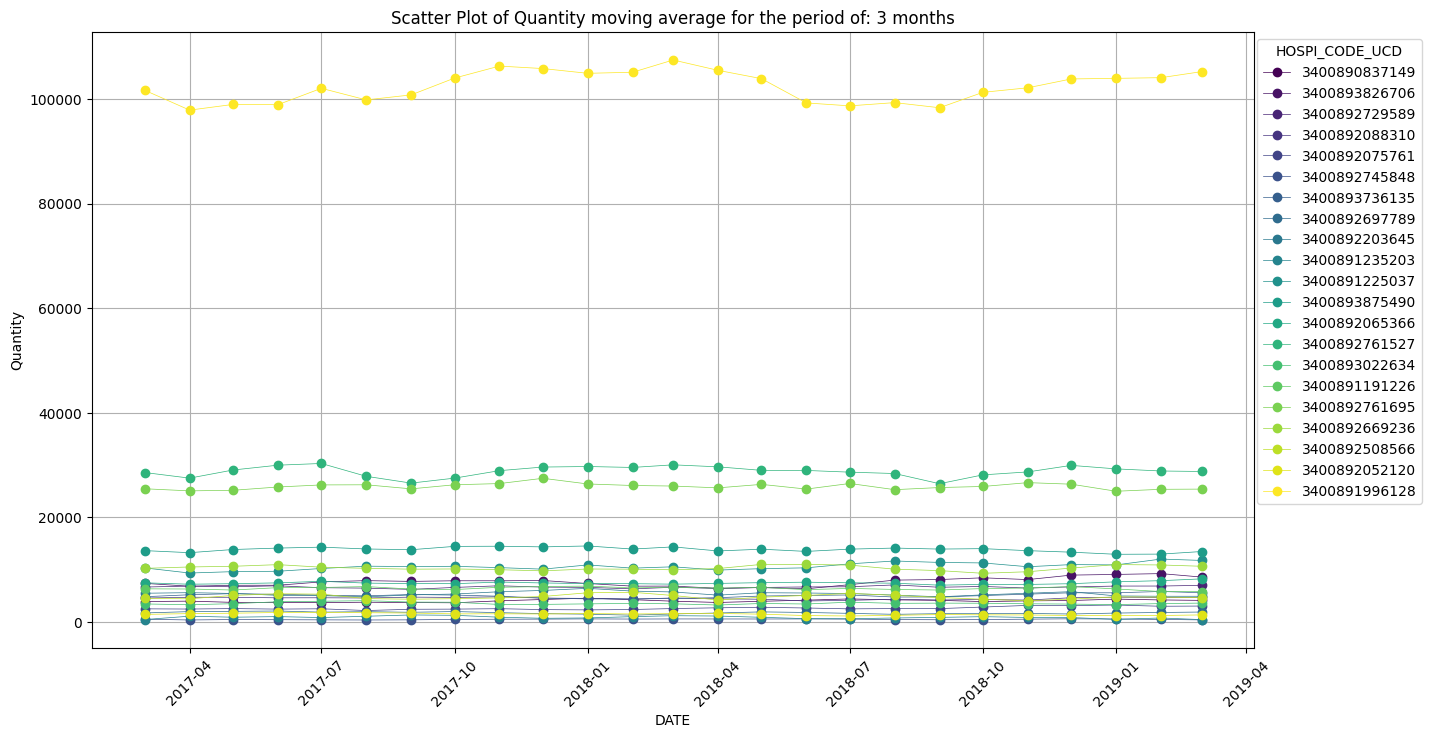

In [10]:
df_h3_ma_3 = calculate_moving_average(df_h3.copy(), 'QUANTITY', 3)
df_h3_ma_3 = df_h3_ma_3.sort_index(axis=1).reset_index(drop=True)
scatterplot_quantity(df_h3_ma_3, 'QUANTITY_MA', 3)

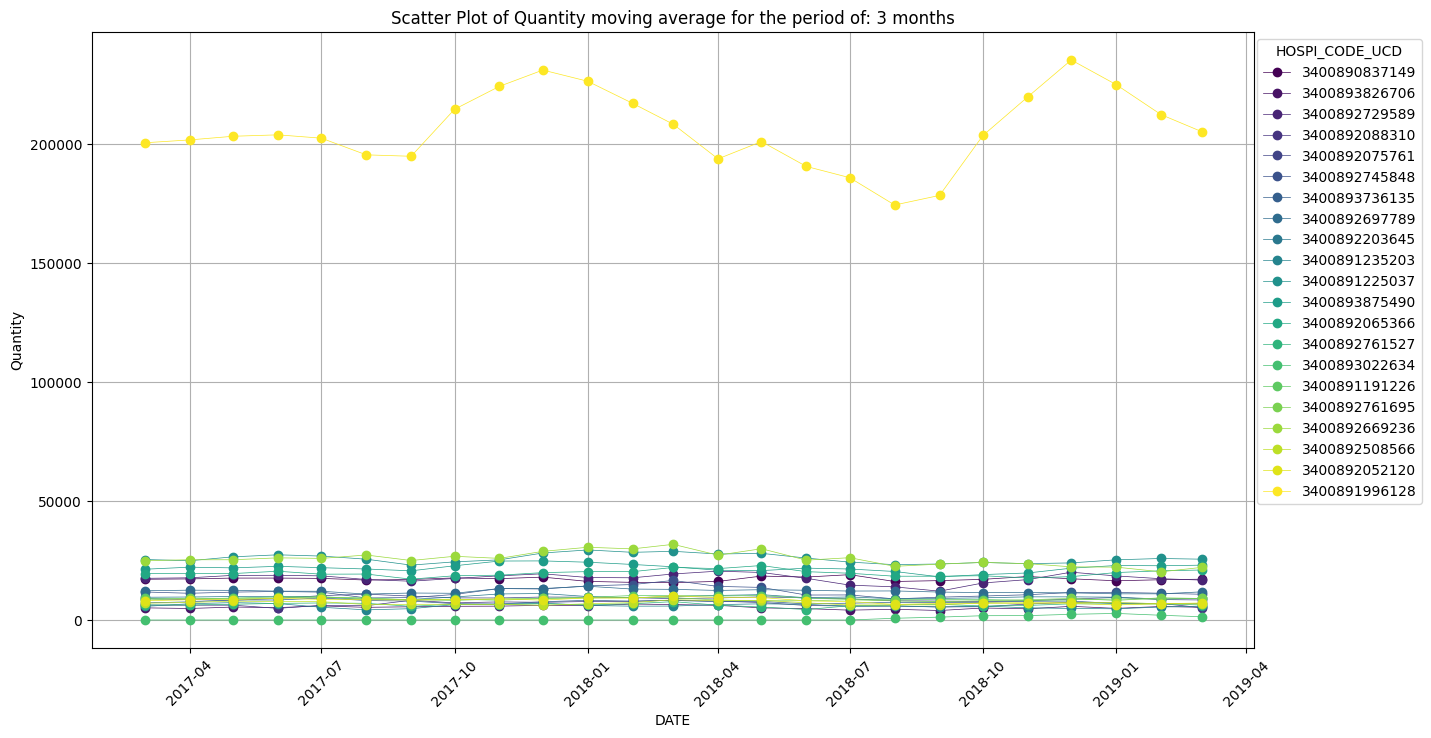

In [11]:
df_h4_ma_3 = calculate_moving_average(df_h4.copy(), 'QUANTITY', 3)
df_h4_ma_3 = df_h4_ma_3.sort_index(axis=1).reset_index(drop=True)
scatterplot_quantity(df_h4_ma_3, 'QUANTITY_MA', 3)

## 3.2 - Correlation analysis

<Axes: >

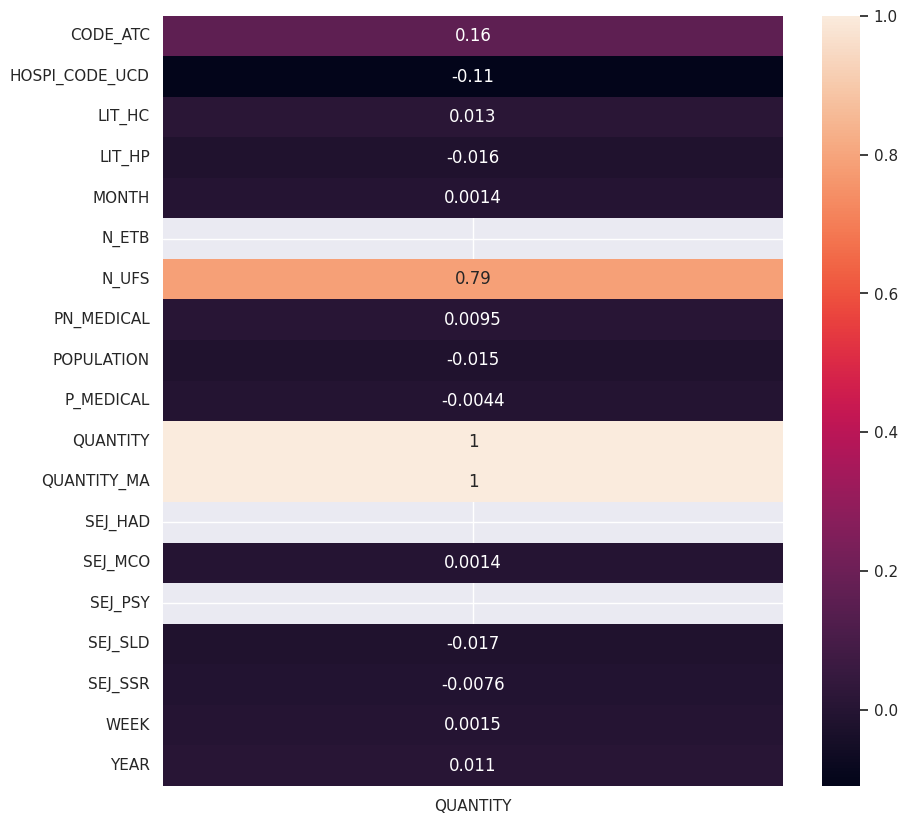

In [12]:
corr = df_h1_ma_3.corr(numeric_only=True)
x = corr[['QUANTITY']]
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(x,annot=True)

<Axes: >

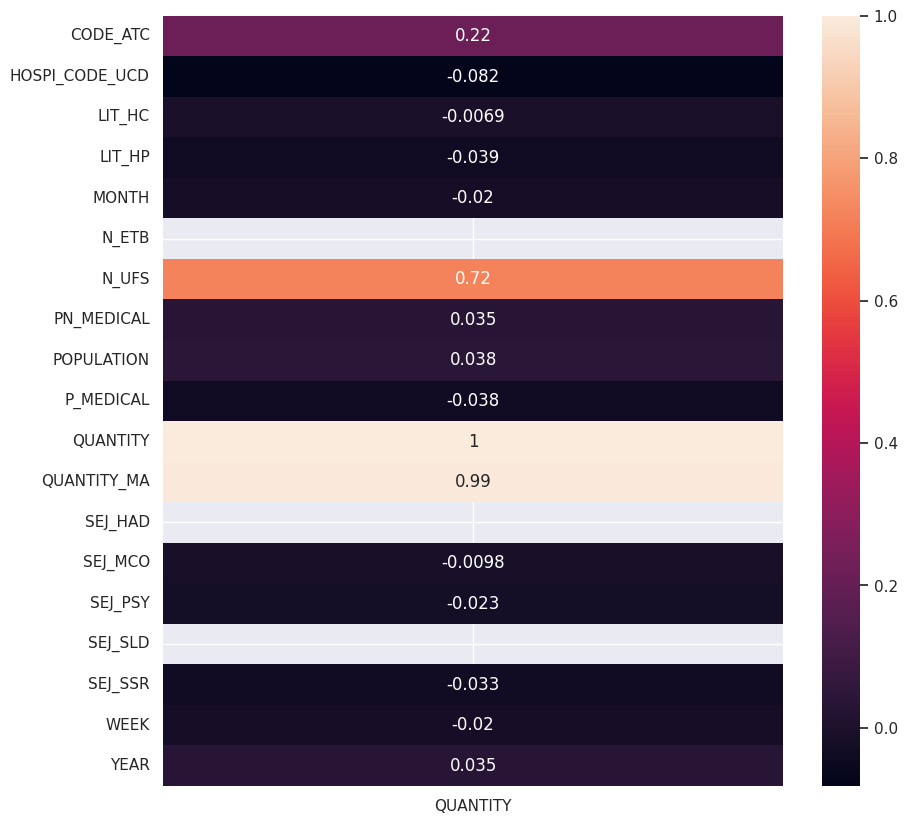

In [13]:
corr = df_h2_ma_3.corr(numeric_only=True)
x = corr[['QUANTITY']]
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(x,annot=True)

<Axes: >

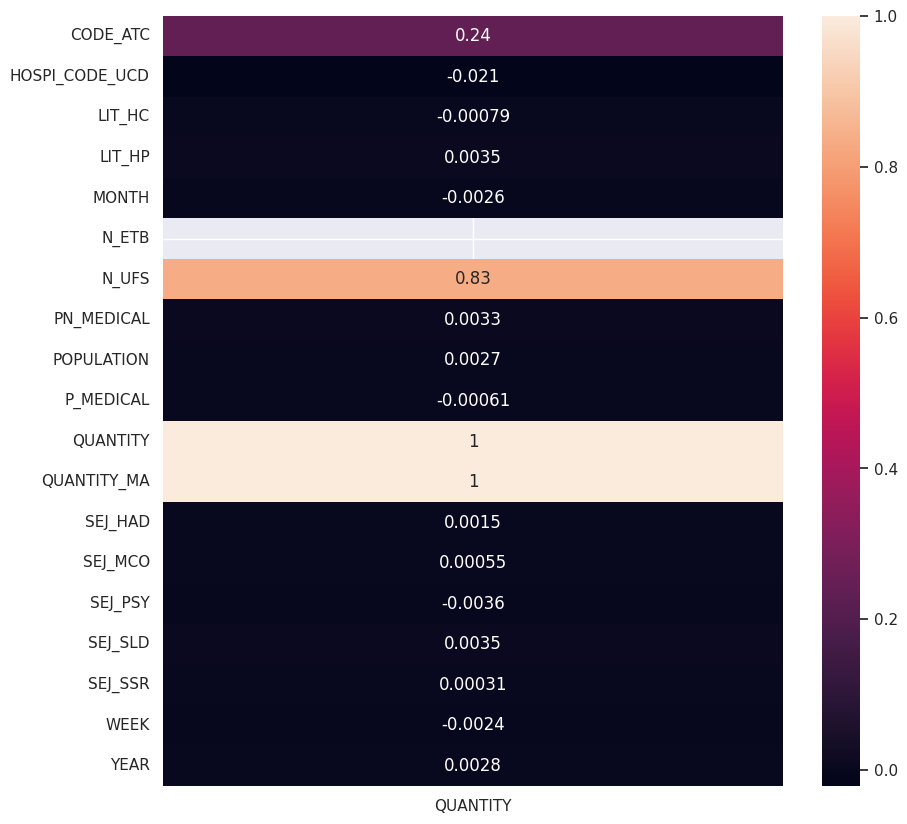

In [14]:
corr = df_h3_ma_3.corr(numeric_only=True)
x = corr[['QUANTITY']]
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(x,annot=True)

<Axes: >

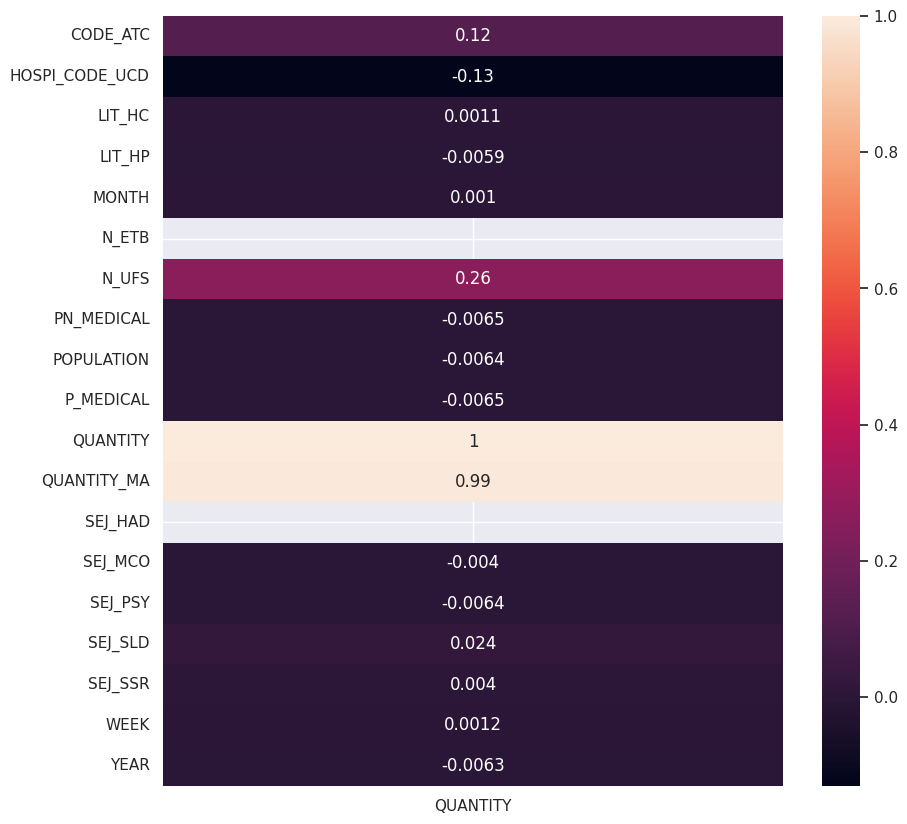

In [15]:
corr = df_h4_ma_3.corr(numeric_only=True)
x = corr[['QUANTITY']]
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(x,annot=True)

<Axes: >

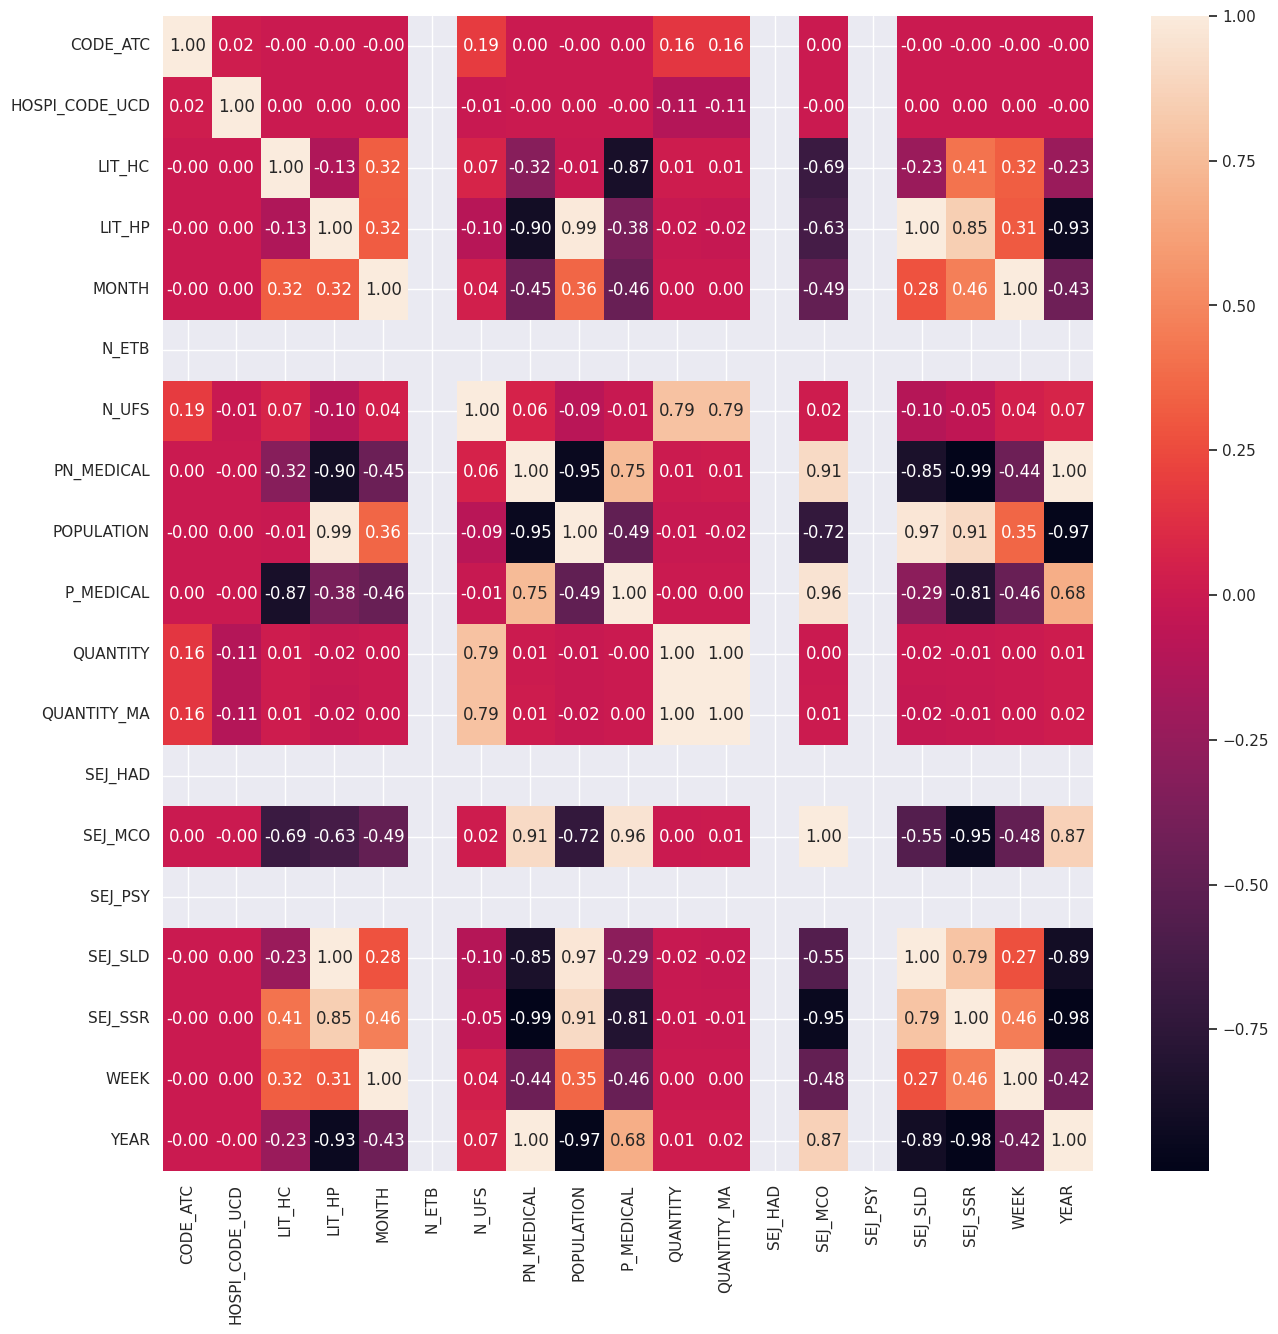

In [16]:

'''
  The constant values are not displayed in the correlation.
'''

corr = df_h1_ma_3.corr(numeric_only=True)
sns.set(rc={'figure.figsize': (15, 15)})
sns.heatmap(corr, annot=True, fmt='.2f')


<Axes: >

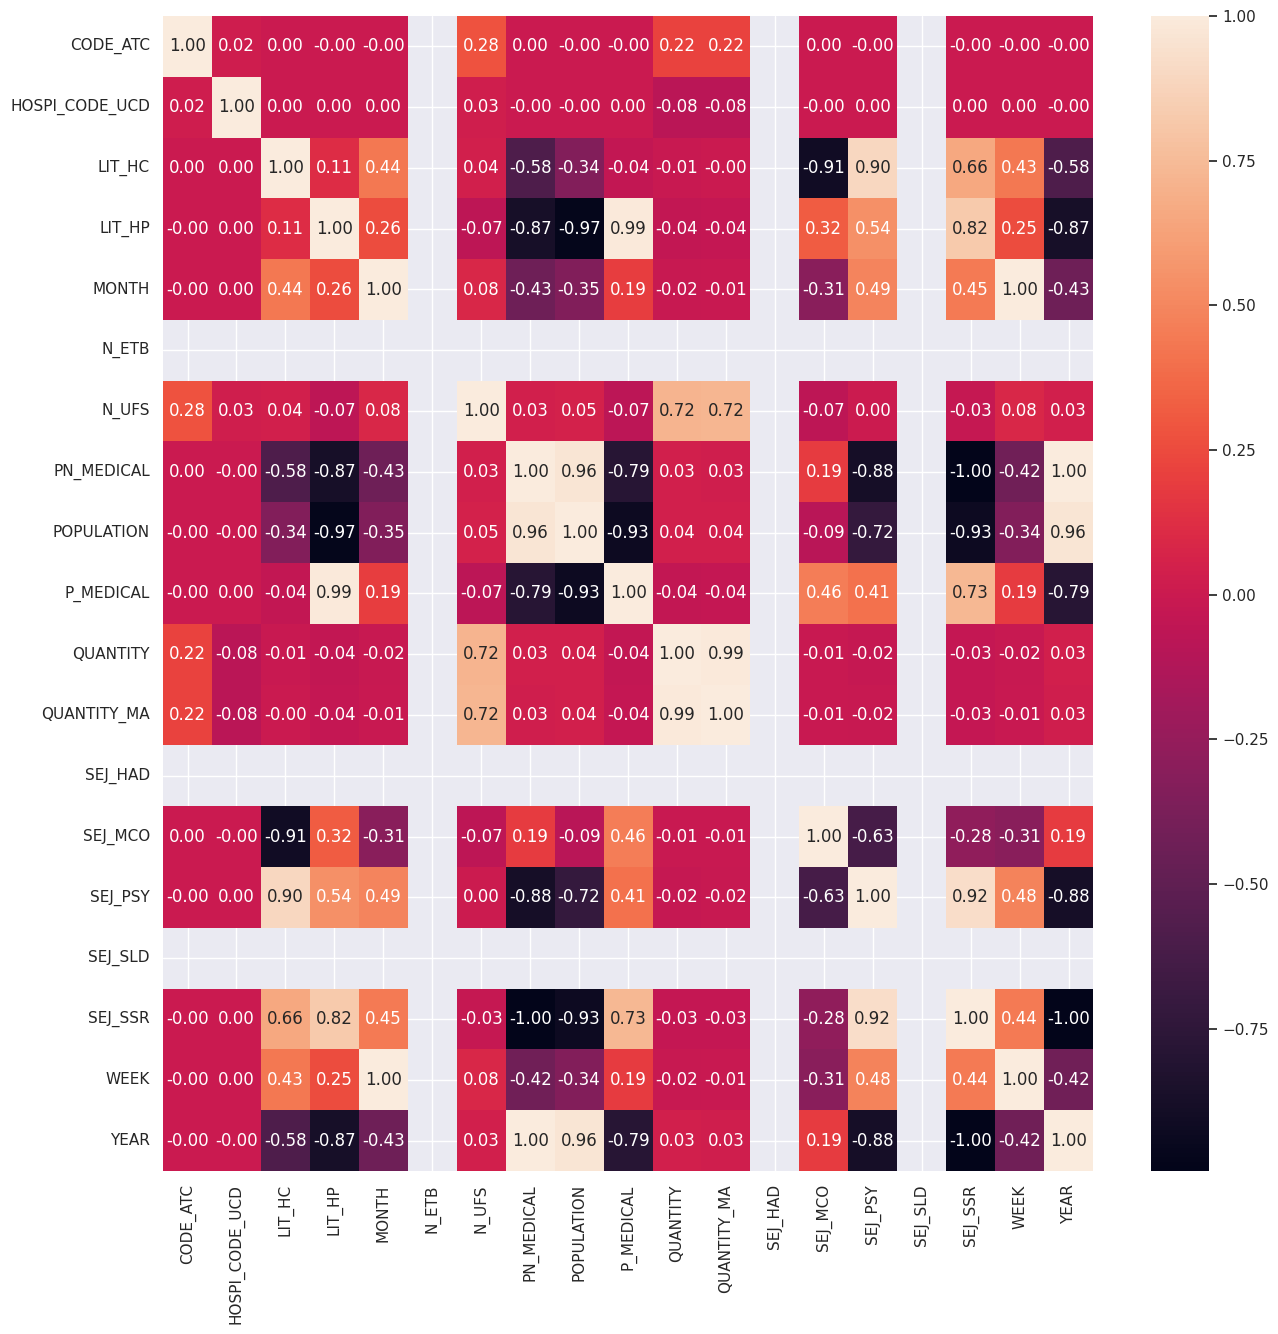

In [17]:

'''
  The constant values are not displayed in the correlation.
'''

corr = df_h2_ma_3.corr(numeric_only=True)
sns.set(rc={'figure.figsize': (15, 15)})
sns.heatmap(corr, annot=True, fmt='.2f')


<Axes: >

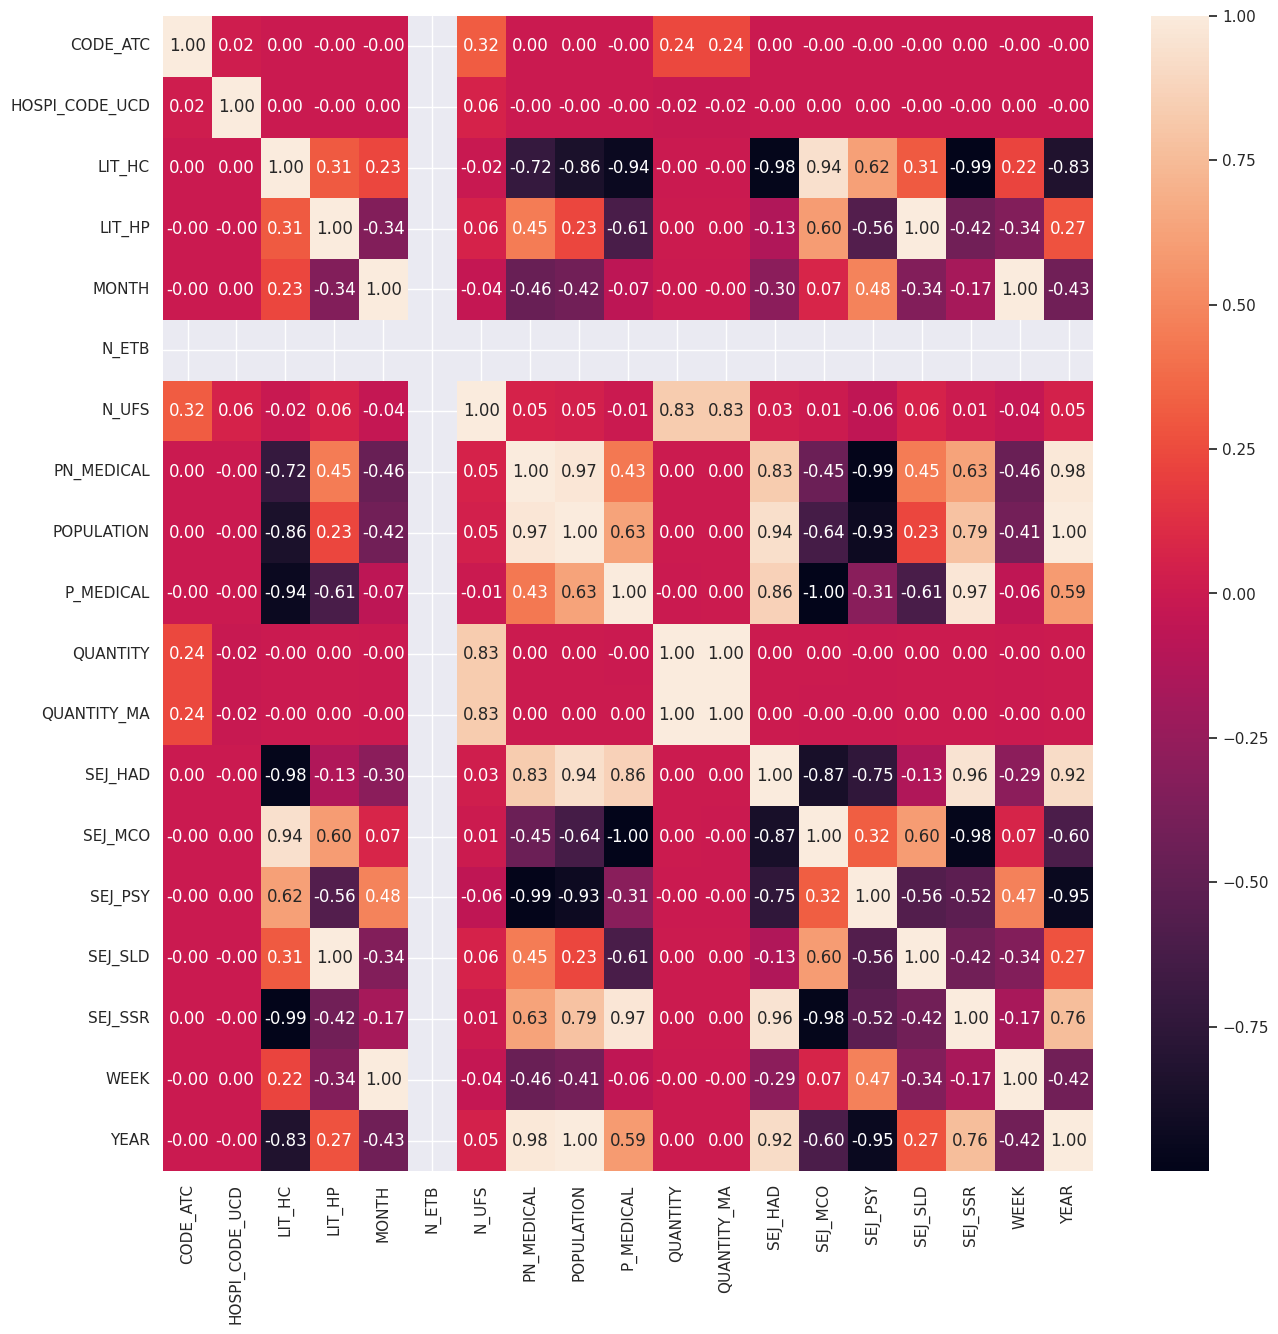

In [18]:

'''
  The constant values are not displayed in the correlation.
'''

corr = df_h3_ma_3.corr(numeric_only=True)
sns.set(rc={'figure.figsize': (15, 15)})
sns.heatmap(corr, annot=True, fmt='.2f')


<Axes: >

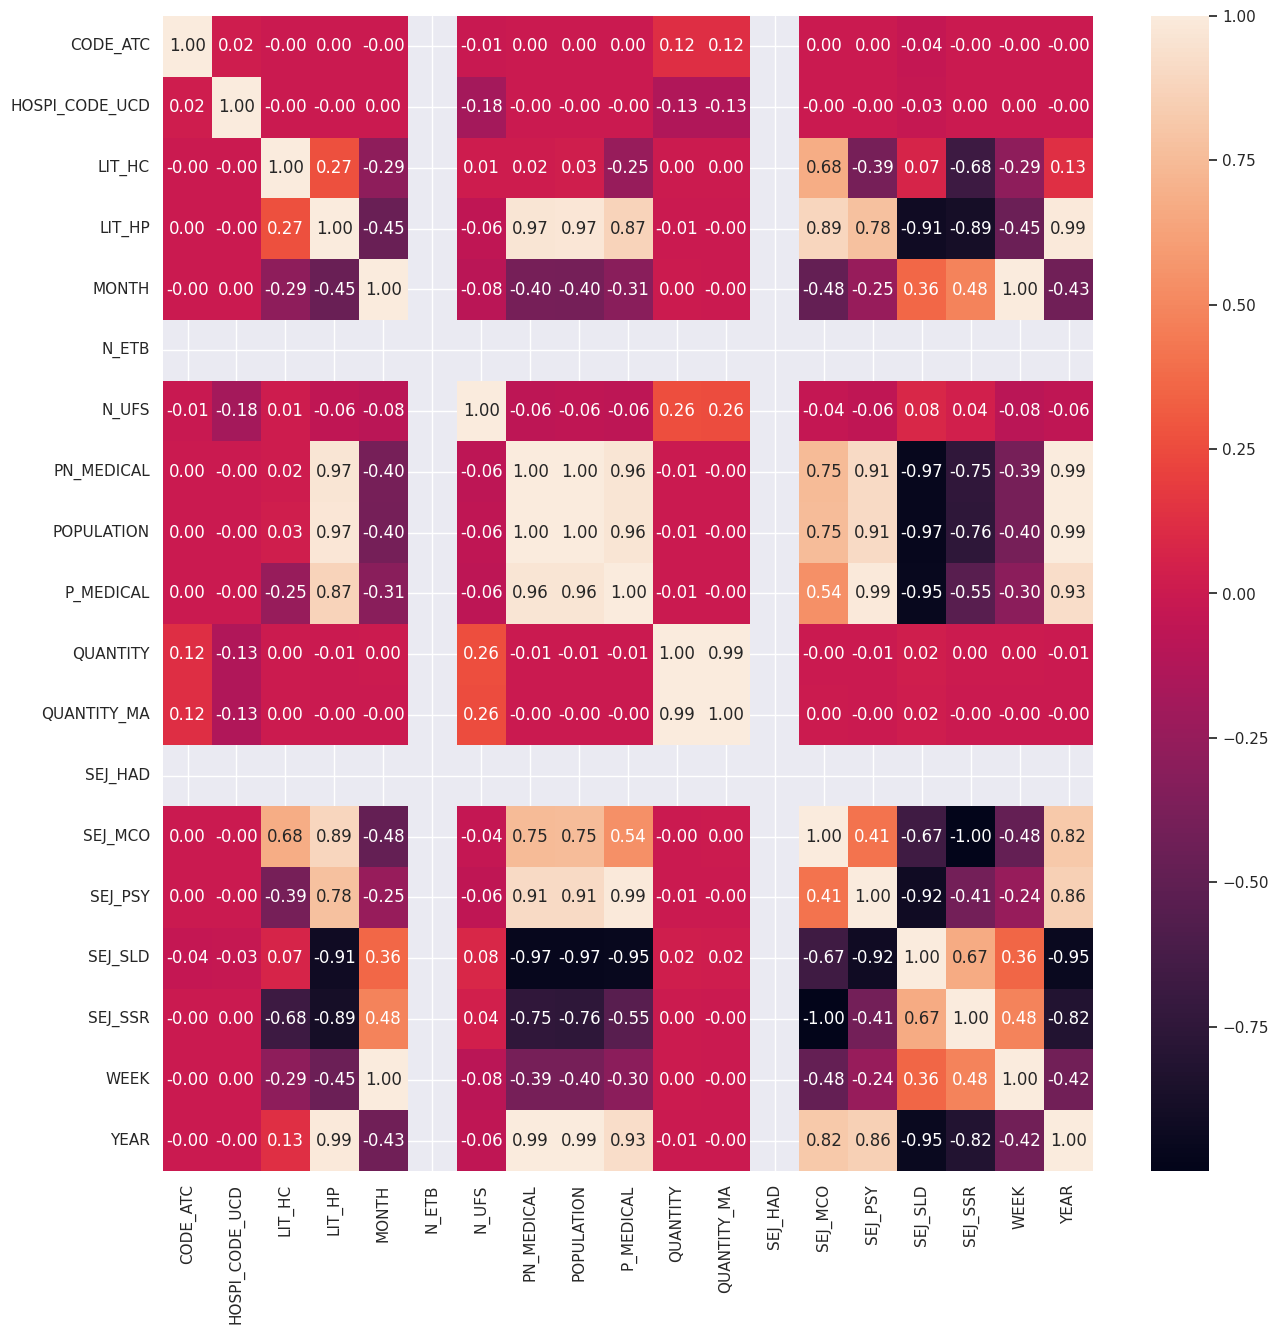

In [19]:

'''
  The constant values are not displayed in the correlation.
'''

corr = df_h4_ma_3.corr(numeric_only=True)
sns.set(rc={'figure.figsize': (15, 15)})
sns.heatmap(corr, annot=True, fmt='.2f')


In [20]:
# Feature selection
df_h1_modified = df_h1_ma_3.drop(['N_ETB','SEJ_HAD', 'SEJ_PSY'], axis=1).copy()

df_h2_modified = df_h2_ma_3.drop(['N_ETB','SEJ_HAD', 'SEJ_SLD'], axis=1).copy()

df_h3_modified = df_h3_ma_3.drop(['N_ETB'], axis=1).copy()

df_h4_modified = df_h4_ma_3.drop(['N_ETB','SEJ_HAD'], axis=1).copy()

In [21]:
df_h1_modified.to_csv('df_h1_ma.csv', index=False)
df_h2_modified.to_csv('df_h2_ma.csv', index=False)
df_h3_modified.to_csv('df_h3_ma.csv', index=False)
df_h4_modified.to_csv('df_h4_ma.csv', index=False)